# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Farah Dina]
- **Email:** [farahdiina00@gmail.com]
- **ID Dicoding:** [B244042F]

## Menentukan Pertanyaan Bisnis

- Pada bulan berapakah sepeda banyak digunakan?
- Apakah pada hari libur atau hari kerja sepeda banyak digunakan?
- Bagaimana pengaruh suhu terhadap jumlah penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- data yang digunakan adalah data bike sharing dengan jumlah kolom sebanyak 17 kolom dan 17379 baris.

### Assessing Data

In [3]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [5]:
print("Jumlah duplikat: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikat:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- data yang digunakan terdiri atas 3 yaitu int, object dan float. Dari data diatas tidak terdapat data duplicate dan data diatas tidak terdapat missing values.

### Cleaning Data

In [6]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Data tersebut tidak terdapat missing values dan duplicate sehingga tidak perlu dilakukan pembersihan data.

## Exploratory Data Analysis (EDA)

### jumlah sepeda dan suhu setiap hari

In [23]:
cnt_dteday_temp = (hour_df[["dteday", "cnt", "temp", "holiday", "weekday"]])
print(cnt_dteday_temp.head())

       dteday  cnt  temp  holiday  weekday
0  2011-01-01   16  0.24        0        6
1  2011-01-01   40  0.22        0        6
2  2011-01-01   32  0.22        0        6
3  2011-01-01   13  0.24        0        6
4  2011-01-01    1  0.24        0        6


- jumlah pengguna sepeda setiap jamnya berdasarkan suhu pada saat itu.

### rata-rata jumlah sepeda setiap bulannya

In [24]:
urutan_terbanyak = bulan_jumlah.sort_values(ascending=False)
print(urutan_terbanyak)

dteday
9     240.773138
6     240.515278
8     238.097627
7     231.819892
5     222.907258
10    222.158511
4     187.260960
11    177.335421
3     155.410726
12    142.303439
2     112.865026
1      94.424773
Name: cnt, dtype: float64


- mengelompokkan jumlah penggunaan sepeda setiap bulannya sehingga dapat diketahui rata-rata tertinggi setiap bulannya. Dapat terlihat bahwa penggunaan sepeda paling banyak pada bulan september dan paling sedikit pada bulan januari.

### hari apa sepeda paling banyak digunakan

In [25]:
holiday = cnt_dteday_temp[cnt_dteday_temp['holiday'] == 1]
cnt_holiday = holiday['cnt'].mean()
print("holiday:", cnt_holiday)

weekday = cnt_dteday_temp[cnt_dteday_temp['weekday'] == 1]
cnt_weekday = weekday['cnt'].mean()
print("weekday:", cnt_weekday)

holiday: 156.87
weekday: 183.74465510286404


**Insight:**
- Mengelompokkan jumlah penggunaan sepeda dan membandingkan jumlah penggunaan sepeda pada hari libur dan hari kerja. Dapat dilihat bahwa penggunaan sepeda pada hari kerja lebih banyak dibandingkan pada hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

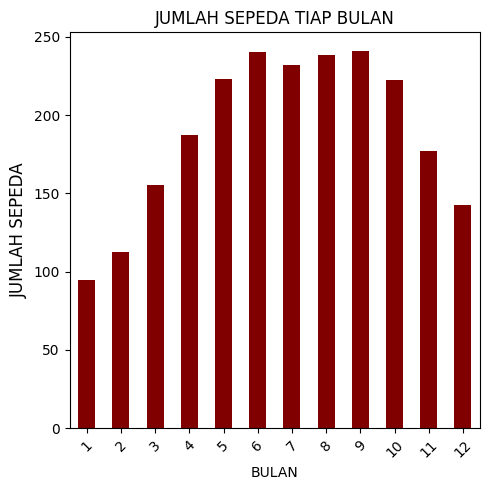

In [26]:
plt.figure(figsize=(5, 5))
bulan_jumlah.plot(kind='bar', color='maroon')

plt.title('JUMLAH SEPEDA TIAP BULAN', fontsize=12)
plt.xlabel('BULAN', fontsize=10)
plt.ylabel('JUMLAH SEPEDA', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan grafik, dapat dilihat bahwa penggunaan sepeda paling banyak yaitu pada bulan september dan paling sedikit pada bulan januari.

### Pertanyaan 2:

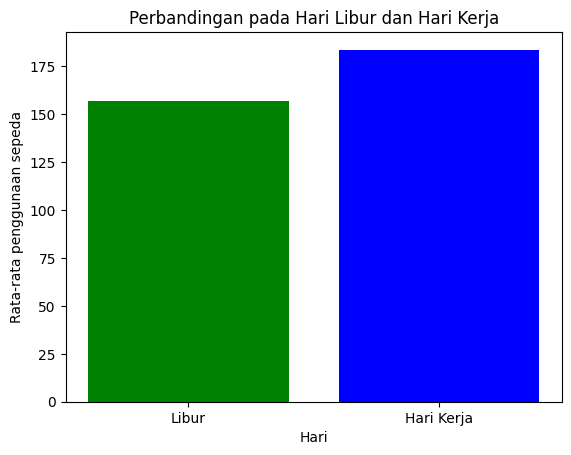

In [27]:
data = {'Hari': ['Libur', 'Hari Kerja'],
        'Rata-rata penggunaan sepeda': [156.87, 183.74]}
df = pd.DataFrame(data)
plt.bar(df['Hari'], df['Rata-rata penggunaan sepeda'], color=['green', 'blue'])
plt.title('Perbandingan pada Hari Libur dan Hari Kerja')
plt.xlabel('Hari')
plt.ylabel('Rata-rata penggunaan sepeda')
plt.show()

- Berdasarkan grafik dapat dilihat bahwa penggunaan sepeda pada hari kerja lebih banyak dibandingkan pada hari libur.

## Analisis Lanjutan (Opsional)

In [28]:
cnt_temp = (hour_df[[ "cnt", "temp"]])
print(cnt_temp.head())

   cnt  temp
0   16  0.24
1   40  0.22
2   32  0.22
3   13  0.24
4    1  0.24


In [29]:
df = pd.DataFrame(cnt_temp)

bins = [0, 0.3, 0.6, 1.0]
labels = ['Rendah', 'Sedang', 'Tinggi']

df['suhu'] = pd.cut(df['temp'], bins=bins, labels=labels, right=False)
suhu_cnt = df.groupby('suhu', observed=True)['cnt'].mean()

print("\njumlah sepeda berdasarkan pengaruh suhu:")
print(suhu_cnt)


jumlah sepeda berdasarkan pengaruh suhu:
suhu
Rendah     77.341803
Sedang    169.199225
Tinggi    263.829313
Name: cnt, dtype: float64


- Pengelompokan suhu menjadi tiga kelompok yaitu rendah (0 - 0,3), sedang (0,3 - 0,6) dan tinggi (0,6 - 1,0) sehingga dapat dilihat perbandingan jumlah penggunaan sepeda berdasarkan suhu.

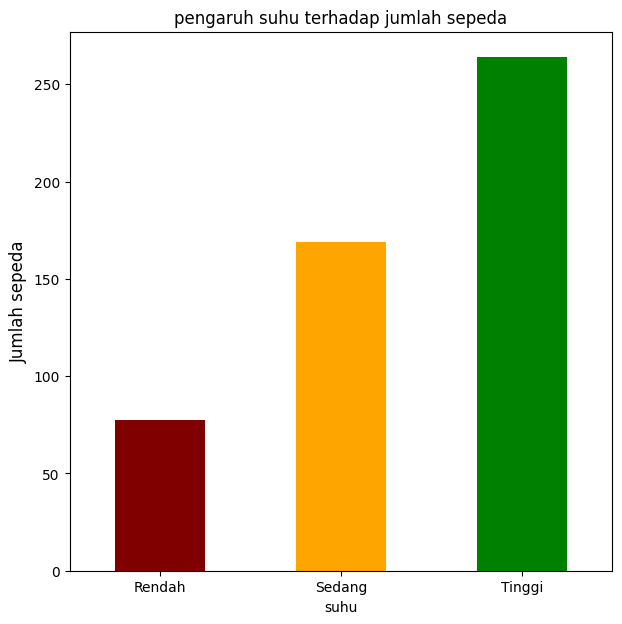

In [30]:
plt.figure(figsize=(7, 7))
suhu_cnt.plot(kind='bar', color=['maroon', 'orange', 'green']),


plt.title('pengaruh suhu terhadap jumlah sepeda', fontsize=12)
plt.xlabel('suhu', fontsize=10)
plt.ylabel('Jumlah sepeda', fontsize=12)

plt.xticks(rotation=0)
plt.show()

- Berdasarkan grafik dapat dilihat penggunaan sepeda lebih banyak pada saat suhu tinggi dan paling sedikit pada suhu rendah.

## Conclusion

- Sepeda banyak digunakan pada bulan september dengan rata-rata penggunaan sebanyak 240.773138. Sedangkan paling sedikit pada bulan januari dengan rata-rata penggunaan sebanyak 94.424773.

- Sepeda lebih banyak digunakan pada hari kerja dengan rata-rata 183.7446. Sedangkan pada hari libur, penggunaan sepeda cenderung sedikit dengan rata-rata 156.87.

- Semakin tinggi suhu semakin tinggi tingkat penggunaan sepeda. Dimana, pada suhu tinggi penggunaan sepeda mencapai 263.829313 sedangkan pada suhu rendah hanya 77.341803.

In [31]:
pip freeze > requirements.txt